In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

In [2]:
results_arr = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/sim_input/results.npy')
observed_arr = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/All_Inputs/Arp256.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


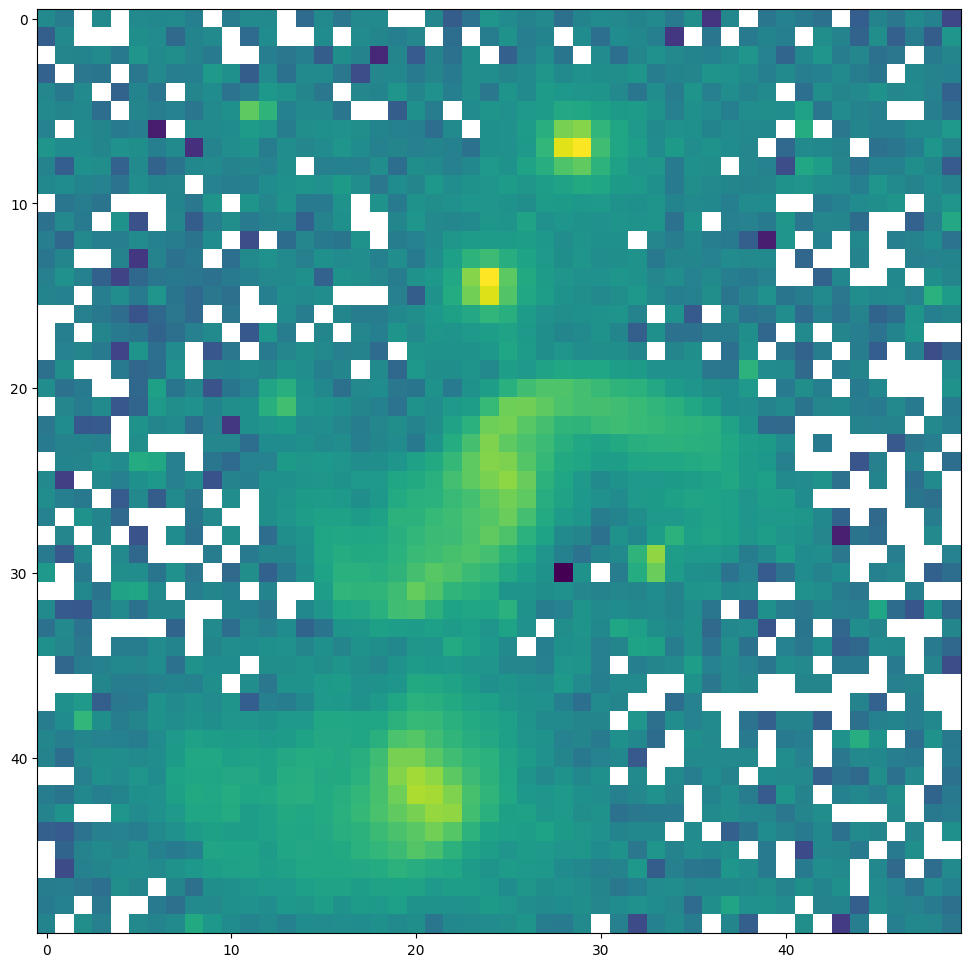

In [3]:
plt.figure(figsize = (12,12))
plt.imshow(np.log10(observed_arr) - 48.6)
plt.show()

In [4]:
coords_df = pd.read_csv('C:/Users/oryan/Documents/Observational_Dataset/data/all_coords.csv', index_col = 0)

In [5]:
arp256_coords = coords_df.query('Names == " Arp256"')

In [6]:
arp256_coords

,Prim_RA,Prim_DEC,Names,Sec_RA,Sec_DEC
4,4.708583,-10.361625,Arp256,4.711833,-10.37695


In [7]:
arp256_ob = (
    arp256_coords
    .assign(prim_coords = arp256_coords.apply(lambda row: SkyCoord(ra = row.Prim_RA  * u.deg, dec = row.Prim_DEC * u.deg, frame = 'fk5'), axis=1))
    .assign(sec_coords = arp256_coords.apply(lambda row: SkyCoord(ra = row.Sec_RA  * u.deg, dec = row.Sec_DEC * u.deg, frame = 'fk5'), axis=1))    
)

In [8]:
dra, ddec = arp256_ob.prim_coords.iloc[0].spherical_offsets_to(arp256_ob.sec_coords.iloc[0])

In [9]:
dra_m = dra.to(u.arcmin)

In [10]:
ddec_m = ddec.to(u.arcmin)

In [11]:
cosmo = FlatLambdaCDM(H0=67.8 * u.km / u.s / u.Mpc, Tcmb0=2.275 * u.K, Om0 = 0.308)

In [12]:
z = 0.0273

In [13]:
conversion = cosmo.kpc_proper_per_arcmin(z)

In [14]:
x = conversion * dra_m
y = conversion * ddec_m

In [15]:
x

<Quantity 6.51466678 kpc>

In [16]:
y

<Quantity -31.22998835 kpc>

In [17]:
sim_x = x / (15 * u.kpc)
sim_y = y / (15 * u.kpc)

In [18]:
sim_x

<Quantity 0.43431112>

In [19]:
sim_y

<Quantity -2.08199922>